![Deap Logo](./Deap%20Logo.png)

DEAP (Distributed Evolutionary Algorithms in Python)

- **Flexibility**: Each component evolutionary algorithms is highly customizable
- **Ease of Use**: DEAP provides many built in tools, functions, and modules for creating and evaluating evolutionary algorithms.
- **Parallelization**: It integrates well with parallel computing frameworks, enabling faster execution for large, computationally expensive problems.
    - DEAP can utilize Python’s built-in multiprocessing module
    - DEAP can also work with the SCOOP framework
    - Distributing the computation of fitness evalutation or sub-populations as used in the island model.
  
### Overview:

- `base.Toolbox`: A container to register functions for generating individuals, performing genetic operations (crossover, mutation), and evaluating fitness.
- `Creator`: A module that allows you to define new types for individuals, including their fitness criteria (whether to maximize or minimize).
- `logbook`: Tracks the performance of the algorithm across generations, including metrics like fitness and statistics.

## Himmelblau's function
In the example we use Deap to minimize Himmelblau's function. 

$$
f(x, y) = (x^2 + y - 11)^2 + (x + y^2 - 7)^2
$$

### Multiple Minima
- Himmelblau' s function has four global minima, making it non-trivial for optimization algorithms.
- This property allows testing whether an algorithm can escape local minima and find the global one.
   
### Non-Convex Surface
- The surface of the function is non - convex, which means that there are regions where gradients can point in different directions, posing difficulties for optimization methods.
  
### Use in Benchmarking 
- Use in Himmelblau' s function is a classic benchmark for algorithms in optimization, machine learning, and evolutionary computation .

In [1]:
from IPython.display import IFrame
IFrame("https://en.wikipedia.org/wiki/Himmelblau%27s_function", width=1000, height=400)

### Structure of Deap algorithm:
#### Define **hyperparameters** 
The constants to be used by the program which typically require some tweaking to increase performance or accuracy
#### Define **Fitness** and **Individual Classes**
To define the individual class and its associated fitness function, use Deap's `creator` module:
```
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
...
creator.create("Individual", list, fitness=creator.FitnessMin)
```

#### We then use the Toolbox to establish our program:
The toolbox is a container in DEAP that holds all the functions necessary for your algorithm. This includes functions for:
- Generating individuals
- Defining the evaluation function
- Registering genetic operators like selection, crossover, and mutation

#### Population and Individual Creation:
You need to define how individuals are generated and register it with the toolbox. This can be done using the tools.initRepeat function, which repeats the initialization of attributes.


<hr />
<div style="text-align: center;">
    <img src="./Basic-structure-of-genetic-algorithm.png" alt="Basic structure of genetic algorithm" width="200"/>
</div>



#### Install dependencies:

In [2]:
pip install plotly deap numpy matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Configuration Setup
- Define some hyperparameters that will be used throughout the implementation.
- Additionally, we define the bounds for our variables and the tournament size for selection.

- **POPULATION_SIZE**: Number of individuals in each generation. 
- **MUTATION_PROB**: The probability of mutation per gene.
- **CROSSOVER_PROB**: The probability of crossover between individuals.
- **BOUNDS**: The range for x and y in Himmelblau’s function.


In [3]:
POPULATION_SIZE = 100
MUTATION_PROB = 0.05
CROSSOVER_PROB = 0.7
N_GENERATIONS = 200
TOURNAMENT_SIZE = 3
BOUNDS = [-6, 6] 

# Defining the Objective Function
The problem we are solving is to minimize Himmelblau’s function.


In [4]:
def himmelblau(individual):
    x, y = individual
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2,

# Genetic Operators
The genetic algorithm relies on three key operations: crossover, mutation, and selection. These operations simulate reproduction, introduce variability, and ensure that the fittest individuals are selected for the next generation.

- **Crossover**: We use two-point crossover to combine two parents' genes to create offspring.
- **Mutation**: Mutates individual bits in the genome with a specified probability.
- **Selection**: We use tournament selection to choose the best individuals for reproduction.


In [5]:
from deap import tools

def crossover(ind1, ind2):
    return tools.cxTwoPoint(ind1, ind2)

def mutation(ind):
    return tools.mutFlipBit(ind, indpb=MUTATION_PROB)

def selection(population, k):
    # k is the number of individuals to select
    return tools.selTournament(population, k, tournsize=TOURNAMENT_SIZE)

# DEAP Initialization
We define how our individuals are created and their fitness is evaluated. In DEAP, we need to register individuals, population, and genetic operators using the toolbox. This provides an abstraction to work with individuals and operators in a modular way.

In [6]:
import random
from deap import base, creator, tools

# Define the individual and fitness
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

# Register all the DEAP functions in the toolbox
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, BOUNDS[0], BOUNDS[1])
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Registering Genetic Operators and Running the Algorithm
Now, we register the genetic operators (crossover, mutation, and selection) and set up the logging of statistics. Then, we run the evolutionary algorithm with DEAP’s `eaSimple` method.

In [7]:
from deap import algorithms
import numpy as np

toolbox.register("evaluate", himmelblau)
toolbox.register("mate", crossover)
toolbox.register("mutate", mutation)
toolbox.register("select", selection)

# Set up logging and statistics
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)

logbook = tools.Logbook()
logbook.header = ["gen", "nevals"] + stats.fields

hall_of_fame = tools.HallOfFame(20)

# Run the algorithm and log statistics
population = toolbox.population(n=POPULATION_SIZE)
population, log = algorithms.eaSimple(population, toolbox, cxpb=CROSSOVER_PROB, mutpb=MUTATION_PROB, 
                                      ngen=N_GENERATIONS, stats=stats, halloffame=hall_of_fame, verbose=True)

# Display the best solution
print("Best individual:", hall_of_fame[0])

gen	nevals	avg    	min    	max    
0  	100   	255.357	1.07426	1113.77
1  	72    	93.5275	1.07426	668.504
2  	68    	36.012 	1.07426	131.829
3  	81    	29.8714	0.419161	180.945
4  	78    	24.6433	0.419161	115.147
5  	73    	19.4274	0.419161	76.7546
6  	71    	16.0995	0.419161	58.9457
7  	65    	10.7014	0.419161	66.8202
8  	81    	2.11911	0.419161	41.2823
9  	63    	0.538038	0.419161	4.23795
10 	64    	2.19995 	0.419161	178.023
11 	63    	0.720162	0.419161	15.4692
12 	83    	0.419161	0.419161	0.419161
13 	70    	0.419161	0.419161	0.419161
14 	71    	0.569661	0.419161	15.4692 
15 	70    	0.569661	0.419161	15.4692 
16 	65    	0.419161	0.419161	0.419161
17 	77    	0.419161	0.419161	0.419161
18 	72    	0.419161	0.419161	0.419161
19 	62    	0.419161	0.419161	0.419161
20 	80    	0.419161	0.419161	0.419161
21 	67    	2.1952  	0.419161	178.023 
22 	80    	0.419161	0.419161	0.419161
23 	75    	0.419161	0.419161	0.419161
24 	74    	0.419161	0.419161	0.419161
25 	65    	0.569661	0.419161	15.4692 
2

# Plotting Convergence
We visualize how the fitness of the population evolves over the generations by plotting the minimum, maximum, and average fitness values from the logbook. We can also take the best individuals in the populations and re-project them onto Himmelblau's function to see if it investigated all global minima.

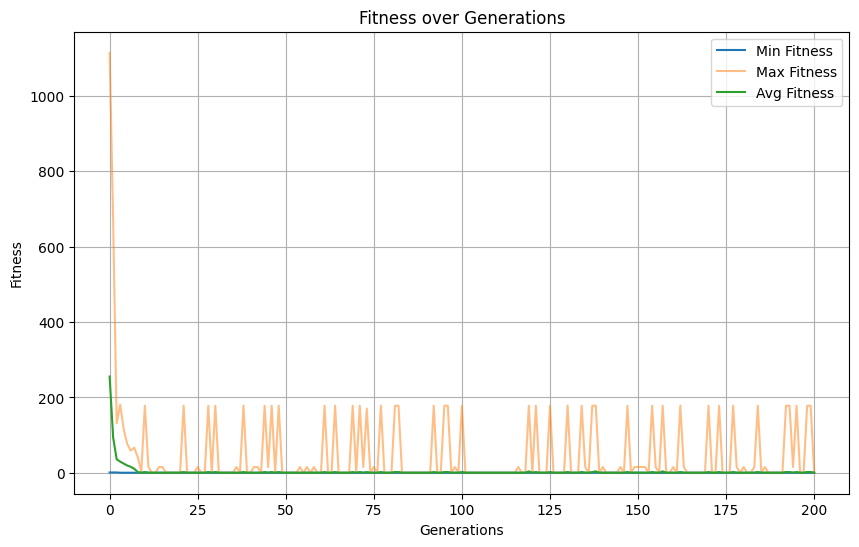

In [8]:
import matplotlib.pyplot as plt

# Getting the fitness values
generations = log.select("gen")
min_fitness = log.select("min")
max_fitness = log.select("max")
avg_fitness = log.select("avg")

# Plotting the values
plt.figure(figsize=(10,6))
plt.plot(generations, min_fitness, label="Min Fitness")
plt.plot(generations, max_fitness, label="Max Fitness", alpha=0.5)
plt.plot(generations, avg_fitness, label="Avg Fitness")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.title("Fitness over Generations")
plt.legend()
plt.grid(True)
plt.show()

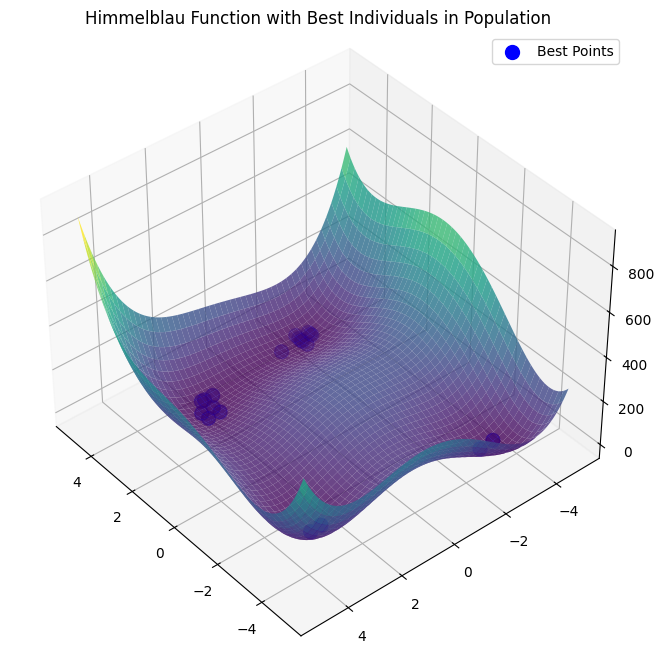

In [9]:
# Define the Himmelblau function
def himmelblau_function(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

# Create a grid of x and y values
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)
Z = himmelblau_function(X, Y)

# Simulate test data (best points from generations)
best_points = np.array(hall_of_fame)

# Calculate Z values for the best points
best_z = himmelblau_function(best_points[:, 0], best_points[:, 1])

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the Himmelblau function surface
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)

# Plot the best points as scatter points
ax.scatter(best_points[:, 0], best_points[:, 1], best_z, color='blue', s=100, label='Best Points', marker='o')

# Set camera position
ax.view_init(elev=40, azim=140)

# Labels and title
ax.set_title('Himmelblau Function with Best Individuals in Population')
ax.legend()

plt.show()

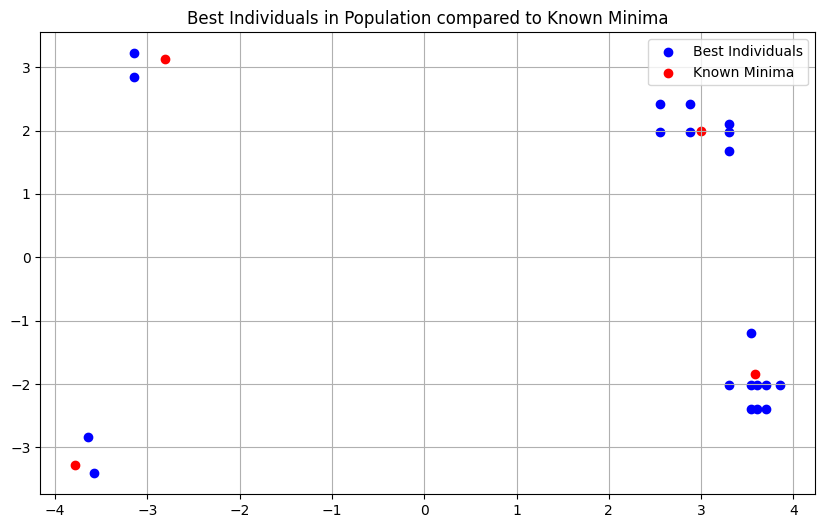

In [10]:
# The set of known minima, where z = 0
minima_points = np.array([
    [3.0, 2.0],
    [-2.805118, 3.131312],
    [-3.779310, -3.283186],
    [3.584428, -1.848126]
])

# Creating the figure
plt.figure(figsize=(10,6))

# Plotting the points
plt.scatter(best_points[:, 0], best_points[:, 1], color='blue', label='Best Individuals')
plt.scatter(minima_points[:, 0], minima_points[:, 1], color='red', label='Known Minima')

# Customizing the graph
plt.title('Best Individuals in Population compared to Known Minima')
plt.grid()
plt.legend()

plt.show()

# Analysis
Since we know the global minima (where z = 0), we can effectively evaluate the performance of the GA. Using the graphs above, we observe the following:
- The average fitness consistently decreases (initially), indication the fitness is improving over time
- The algorithm is able to converge fairly early, with the average fitness metric in the first graph plateauing within tens of generations
- The best individuals in the population converge very close to the global minima

As demonstrated below, the best individuals in the population are able to converge to coordinates that are than 0.5 units away from the true global minima. This is a low distance given that the search space spans a coordinate range of [-6, 6].

In [11]:
import math

def distance_func(coord1, coord2):
    return math.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

# Finding the proximity to the minima (smallest distance between all minima and the point)
final_dists = []
for point in best_points:
    final_dists.append(
        min([distance_func(minima, point) for minima in minima_points])
    )

print(f"Average distance to Known Minima: {sum(final_dists)/len(final_dists)}")

Average distance to Known Minima: 0.38246061131414744


# Conclusion
Using the DEAP library, we successfully implemented a GA with minimal code to solve the Himmelblau function, a complex optimization problem with several global minima. With minimal code, the algorithm explored the search space and quickly converged on solutions very close to the known minima. The performance of the algorithm was validated, showing that the best individuals in the populations were already near-optimal solutions.

The DEAP library offers an assortment of advantages over doing everything yourself:
- A fully functional GA can be written in relatively few lines of code
- Feature rich, allows for an abundance of logging and tracking of best performing individuals
- High performance (converged using 1000 generations in under a second)
- Key parameters, such as crossover or mutation can be quickly changed, oftentimes requiring only one line of code to be changed
- As a popular library with [85,000 weekly downloads](https://pypistats.org/packages/deap), lots of information about it is available online

The most significant drawback associated with DEAP is the simplicity it provides for the user. While EA creation is easy, it can often take some time to find the appropriate functions or methods, and error messages can occasionally be unclear. This is where online references will be most helpful.    

Sources:
- https://aviral-agarwal.medium.com/implementation-of-genetic-algorithm-evolutionary-algorithm-in-python-using-deap-framework-c2d4bd247f70
- https://en.wikipedia.org/wiki/Himmelblau%27s_function
- https://deap.readthedocs.io/en/devel/examples/ga_onemax.html